### 1.Import and read the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Administrator\Downloads\beer_data.csv")
df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [2]:
df.columns.tolist()

['beer_beerid', 'review_profilename', 'review_overall']

In [3]:
# cheking for the number of rows and columns in the given data
df.shape

(475984, 3)

In [4]:
df.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [5]:
# Cheking for the datatypes, memory usage etc.,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         475984 non-null  int64  
 1   review_profilename  475884 non-null  object 
 2   review_overall      475984 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.1+ MB


In [6]:
# Checking the value counts of all the columns...
for i in df.columns:
    print(df[i].value_counts())

2093     987
412      976
1904     905
1093     848
92       818
        ... 
61034      1
50799      1
26235      1
18047      1
65696      1
Name: beer_beerid, Length: 40308, dtype: int64
northyorksammy    1846
mikesgroove       1379
BuckeyeNation     1338
Thorpe429         1072
ChainGangGuy      1046
                  ... 
Wyrdbrew             1
Skeeter206           1
bartmon              1
briankrespan         1
Scrancy              1
Name: review_profilename, Length: 22497, dtype: int64
4.0    174804
4.5     97349
3.5     90804
3.0     49523
5.0     27176
2.5     17601
2.0     11615
1.5      3817
1.0      3289
0.0         6
Name: review_overall, dtype: int64


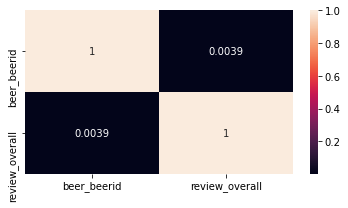

In [7]:
# correlation map
plt.figure(figsize=(6,3))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [8]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

beer_beerid           0.00
review_profilename    0.02
review_overall        0.00
dtype: float64

In [9]:
# Dropping the null values from dataframe
df = df.dropna()

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

beer_beerid           0.0
review_profilename    0.0
review_overall        0.0
dtype: float64

In [11]:
#Checking duplicates on two cloumns
df.duplicated(['beer_beerid','review_profilename']).sum()

1422

In [12]:
# Dropping Duplicates
df = df.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         474462 non-null  int64  
 1   review_profilename  474462 non-null  object 
 2   review_overall      474462 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.7+ MB


### 2. Data Preparation

In [14]:
#checking review counts on Beerid
df1 = pd.DataFrame(df.beer_beerid.value_counts(sort=True))
df1.shape

(40304, 1)

In [15]:
df1

,beer_beerid
2093,977
412,966
1904,902
1093,840
92,812
...,...
31461,1
53362,1
57460,1
42666,1


Text(0.5, 0, 'Review_counts')

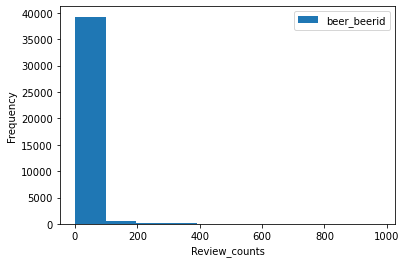

In [16]:
# plotting histogram for checking the review counts on Beerid
df1.plot.hist(bins=10)
plt.xlabel('Review_counts')

Text(0.5, 0, 'Review_counts')

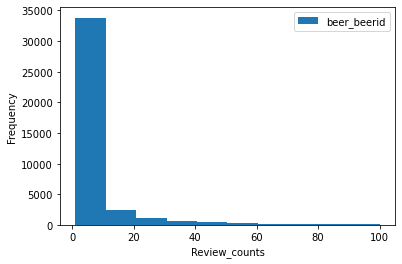

In [17]:
#plotting histogram for Checking Beerid which have recieved less than or equal 100 review
beerid_counts = pd.DataFrame(df1[df1<=100])
beerid_counts.plot.hist(bins=10)
plt.xlabel('Review_counts')

In [18]:
#Checking Beerid which have recieved 1 review
beerid_counts = pd.DataFrame(df1[df1==1]).sum()
beerid_counts

beer_beerid    18080.0
dtype: float64

In [19]:
#Checking Beerid which have recieved less than are equal to 40 reviews
beerid_count_40 = pd.DataFrame(df1[df1<=40]).sum()
beerid_count_40

beer_beerid    161165.0
dtype: float64

In [20]:
dff = df.groupby('beer_beerid')['review_overall'].count().reset_index()
print(dff.count())

dff = dff.sort_values('review_overall', ascending=False)

beers_countt = dff[dff.review_overall >= 40]
beers_countt.shape

beer_beerid       40304
review_overall    40304
dtype: int64


(2499, 2)

In [21]:
# Checking review_counts by user count
user = pd.DataFrame(df.review_profilename.value_counts(sort=True))
user

,review_profilename
northyorksammy,1842
mikesgroove,1373
BuckeyeNation,1336
Thorpe429,1072
ChainGangGuy,1046
...,...
BloodySamFlint,1
phishtube,1
TequilaGeorge,1
Wyrdbrew,1


Text(0.5, 0, 'Reviews_count')

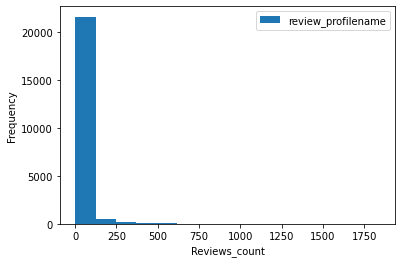

In [22]:
user.plot.hist(bins=15)
plt.xlabel('Reviews_count')

Text(0.5, 0, 'Reviews_count')

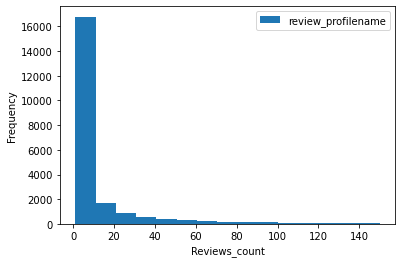

In [23]:
#checking the users reviews less than or equal 150
user_count = pd.DataFrame(user[user<=150])
user_count.plot.hist(bins=15)
plt.xlabel('Reviews_count')

In [24]:
dff1 = df.groupby('review_profilename')['review_overall'].count().reset_index()
users_count1 = dff1[dff1.review_overall >= 40]

users_count1 = users_count1.sort_values('review_overall', ascending=False)

users_count1.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


In [25]:
#Creating new Data Frame after applying filter on beer review >= 40 and user review >=40
final_df = df.merge(beers_countt,how='inner',on='beer_beerid')
final_df = final_df.merge(users_count1,how='inner',on='review_profilename')
final_df

,beer_beerid,review_profilename,review_overall_x,review_overall_y,review_overall
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518
...,...,...,...,...,...
231628,878,kmacphail,3.0,63,56
231629,724,kmacphail,3.5,104,56
231630,1826,kmacphail,5.0,113,56
231631,401,kmacphail,4.5,63,56


In [26]:
# renaming the columns after merging
final_df.rename(columns={'review_overall_x' : 'rating','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},
                  inplace = True)
final_df

,beer_beerid,review_profilename,rating,beers_reviews,users_reviews
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518
...,...,...,...,...,...
231628,878,kmacphail,3.0,63,56
231629,724,kmacphail,3.5,104,56
231630,1826,kmacphail,5.0,113,56
231631,401,kmacphail,4.5,63,56


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231633 entries, 0 to 231632
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         231633 non-null  int64  
 1   review_profilename  231633 non-null  object 
 2   rating              231633 non-null  float64
 3   beers_reviews       231633 non-null  int64  
 4   users_reviews       231633 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.7+ MB


### 3. Data exploration

In [28]:
final_df.rating.value_counts(ascending=True)

1.0     1130
1.5     1338
2.0     4573
2.5     7173
5.0    12687
3.0    21713
3.5    43700
4.5    50560
4.0    88759
Name: rating, dtype: int64

In [29]:
avg_beer_ratings = final_df.groupby('beer_beerid')['rating'].agg(['mean']).reset_index()
avg_beer_ratings.head()

,beer_beerid,mean
0,5,3.546512
1,6,3.684659
2,7,3.257353
3,10,3.849112
4,14,3.910000


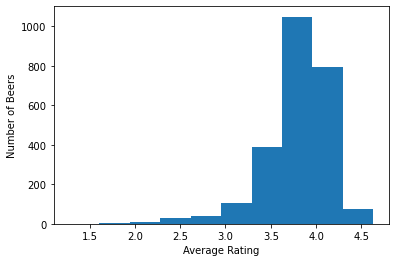

In [30]:
plt.hist(avg_beer_ratings['mean'], bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

In [31]:
avg_user_ratings = final_df.groupby('review_profilename')['rating'].agg(['mean']).reset_index()
avg_user_ratings.head()

,review_profilename,mean
0,05Harley,4.140625
1,100floods,4.078125
2,1759Girl,3.682927
3,1fastz28,3.862745
4,3Vandoo,3.891304


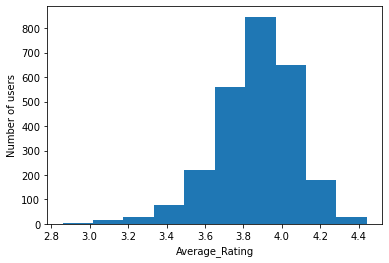

In [32]:
plt.hist(avg_user_ratings['mean'], bins=10)
plt.xlabel('Average_Rating')
plt.ylabel('Number of users')
plt.show()

In [33]:
avg_beer_reviews = final_df.groupby('beer_beerid')['beers_reviews'].agg(['mean']).reset_index()
avg_beer_reviews.head()

,beer_beerid,mean
0,5,113
1,6,253
2,7,205
3,10,218
4,14,59


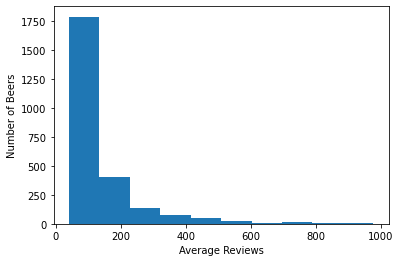

In [34]:
plt.hist(avg_beer_reviews['mean'], bins=10)
plt.xlabel('Average Reviews')
plt.ylabel('Number of Beers')
plt.show()

In [35]:
avg_user_reviews = final_df.groupby('review_profilename')['users_reviews'].agg(['mean']).reset_index()
avg_user_reviews.head()

,review_profilename,mean
0,05Harley,41
1,100floods,44
2,1759Girl,73
3,1fastz28,124
4,3Vandoo,101


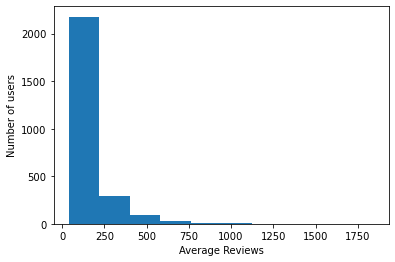

In [36]:
plt.hist(avg_user_reviews['mean'], bins=10)
plt.xlabel('Average Reviews')
plt.ylabel('Number of users')
plt.show()

### 4. Recommendation Models

In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, test_size=0.30, random_state=31)

In [38]:
print(train.shape)
print(test.shape)

(162143, 5)
(69490, 5)


In [39]:
# pivot ratings into Beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [40]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset

In [41]:
dummy_train = train.copy()
dummy_test = test.copy()

In [42]:
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [43]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [44]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3Vandoo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  User Similarity Matrix

#### Using Cosine Similarity

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.0447414  ... 0.01311939 0.0338432  0.06157584]
 [0.         1.         0.         ... 0.02389333 0.         0.12616121]
 [0.0447414  0.         1.         ... 0.0308992  0.0289192  0.03551641]
 ...
 [0.01311939 0.02389333 0.0308992  ... 1.         0.01744435 0.05415474]
 [0.0338432  0.         0.0289192  ... 0.01744435 1.         0.04776043]
 [0.06157584 0.12616121 0.03551641 ... 0.05415474 0.04776043 1.        ]]


In [47]:
user_correlation.shape

(2612, 2612)

### Using adjusted Cosine

##### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [48]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [49]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the rating of the beers for each user around 0 mean

In [50]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [51]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.328767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.328767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [52]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.00000000e+00  0.00000000e+00  1.17250672e-02 ...  2.54610586e-03
  -2.05031021e-02  4.16772739e-02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.40239711e-04
   0.00000000e+00  1.43422518e-03]
 [ 1.17250672e-02  0.00000000e+00  1.00000000e+00 ...  1.03514029e-02
  -1.28106623e-02  7.91775592e-03]
 ...
 [ 2.54610586e-03  1.40239711e-04  1.03514029e-02 ...  1.00000000e+00
  -1.14322336e-04  3.28167366e-03]
 [-2.05031021e-02  0.00000000e+00 -1.28106623e-02 ... -1.14322336e-04
   1.00000000e+00 -7.63036845e-03]
 [ 4.16772739e-02  1.43422518e-03  7.91775592e-03 ...  3.28167366e-03
  -7.63036845e-03  1.00000000e+00]]


### Prediction

In [53]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.00000000e+00, 0.00000000e+00, 1.17250672e-02, ...,
        2.54610586e-03, 0.00000000e+00, 4.16772739e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.40239711e-04, 0.00000000e+00, 1.43422518e-03],
       [1.17250672e-02, 0.00000000e+00, 1.00000000e+00, ...,
        1.03514029e-02, 0.00000000e+00, 7.91775592e-03],
       ...,
       [2.54610586e-03, 1.40239711e-04, 1.03514029e-02, ...,
        1.00000000e+00, 0.00000000e+00, 3.28167366e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.16772739e-02, 1.43422518e-03, 7.91775592e-03, ...,
        3.28167366e-03, 0.00000000e+00, 1.00000000e+00]])

In [54]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[1.5412008 , 3.06140547, 2.59913994, ..., 1.75303543, 4.66305461,
        1.88295881],
       [0.55627045, 1.89631683, 1.20512222, ..., 0.85580317, 1.84271126,
        1.85862727],
       [3.84478978, 5.43820886, 5.54558689, ..., 2.00337734, 4.04028452,
        3.14664239],
       ...,
       [3.23768293, 3.7048888 , 3.54290674, ..., 2.02290899, 3.24643872,
        1.66253104],
       [3.72064169, 3.84405526, 3.11655843, ..., 0.95201477, 2.97257084,
        2.71683882],
       [1.95361357, 5.18411112, 3.04186909, ..., 2.45504664, 4.59354631,
        2.75815176]])

In [55]:
user_predicted_ratings.shape

(2612, 2499)

In [56]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,1.541201,3.061405,2.599140,3.860016,0.846330,0.964763,3.869859,1.796612,8.893440,3.739932,...,0.297018,2.122080,0.752679,1.797002,0.786752,1.121472,0.497334,1.753035,4.663055,1.882959
100floods,0.556270,1.896317,1.205122,2.664549,0.525415,0.266831,2.103230,0.665671,5.238718,3.007415,...,1.453978,0.964714,0.197242,0.673003,0.630650,0.440468,0.795797,0.855803,1.842711,1.858627
1759Girl,3.844790,5.438209,5.545587,8.411077,2.467383,1.699153,6.159479,5.541952,15.868927,10.113836,...,1.555277,1.728238,0.691703,2.971007,2.072526,0.774953,1.170068,2.003377,4.040285,3.146642
1fastz28,3.253311,0.000000,3.102545,6.277283,1.519632,2.108685,5.054095,3.425127,13.464202,8.967033,...,0.000000,1.327634,1.039783,1.902737,1.280279,1.647223,1.766525,1.770681,2.245913,2.027106
3Vandoo,3.479863,6.692216,5.346780,7.806611,2.522233,2.318417,4.233980,5.315379,12.961816,8.925130,...,1.412036,1.302747,0.993555,2.442810,1.313525,1.042667,0.903666,1.430598,2.931284,1.624225


### Finding the top 5 recommendation for the user 1

In [57]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
2093    11.516254
92      11.012656
1013    10.864803
1093    10.569330
1708    10.006062
Name: 100floods, dtype: float64

In [58]:
top_10_user = user_final_rating.iloc[:10,:10]
top_10_user

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
05Harley,1.541201,3.061405,2.599140,3.860016,0.846330,0.964763,3.869859,1.796612,8.893440,3.739932
100floods,0.556270,1.896317,1.205122,2.664549,0.525415,0.266831,2.103230,0.665671,5.238718,3.007415
1759Girl,3.844790,5.438209,5.545587,8.411077,2.467383,1.699153,6.159479,5.541952,15.868927,10.113836
1fastz28,3.253311,0.000000,3.102545,6.277283,1.519632,2.108685,5.054095,3.425127,13.464202,8.967033
3Vandoo,3.479863,6.692216,5.346780,7.806611,2.522233,2.318417,4.233980,5.315379,12.961816,8.925130
4000qtrap,2.036612,4.051737,2.381776,4.744252,1.243674,1.064103,4.092787,2.907483,8.528708,5.104207
4DAloveofSTOUT,0.890658,1.612539,1.226284,1.587476,0.436574,0.455201,1.723835,2.021510,4.214201,1.648652
51mmz0rz,2.029437,3.226161,3.002029,5.466977,0.695186,2.200638,3.073277,3.949412,8.671460,8.118660
7ways,1.218759,2.285697,3.010629,4.475187,0.366593,1.748725,3.349708,2.338164,8.152760,3.538500


In [59]:
top_10_user_T = top_10_user.transpose()
top_10_user_T

review_profilename,05Harley,100floods,1759Girl,1fastz28,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,7ways,99bottles
beer_beerid,,,,,,,,,,
5,1.541201,0.556270,3.844790,3.253311,3.479863,2.036612,0.890658,2.029437,1.218759,4.846201
6,3.061405,1.896317,5.438209,0.000000,6.692216,4.051737,1.612539,3.226161,2.285697,7.487660
7,2.599140,1.205122,5.545587,3.102545,5.346780,2.381776,1.226284,3.002029,3.010629,5.041422
10,3.860016,2.664549,8.411077,6.277283,7.806611,4.744252,1.587476,5.466977,4.475187,10.064961
14,0.846330,0.525415,2.467383,1.519632,2.522233,1.243674,0.436574,0.695186,0.366593,2.743616
15,0.964763,0.266831,1.699153,2.108685,2.318417,1.064103,0.455201,2.200638,1.748725,2.978518
17,3.869859,2.103230,6.159479,5.054095,4.233980,4.092787,1.723835,3.073277,3.349708,9.090591
19,1.796612,0.665671,5.541952,3.425127,5.315379,2.907483,2.021510,3.949412,2.338164,6.574742
30,8.893440,5.238718,15.868927,13.464202,12.961816,8.528708,4.214201,8.671460,8.152760,16.564600


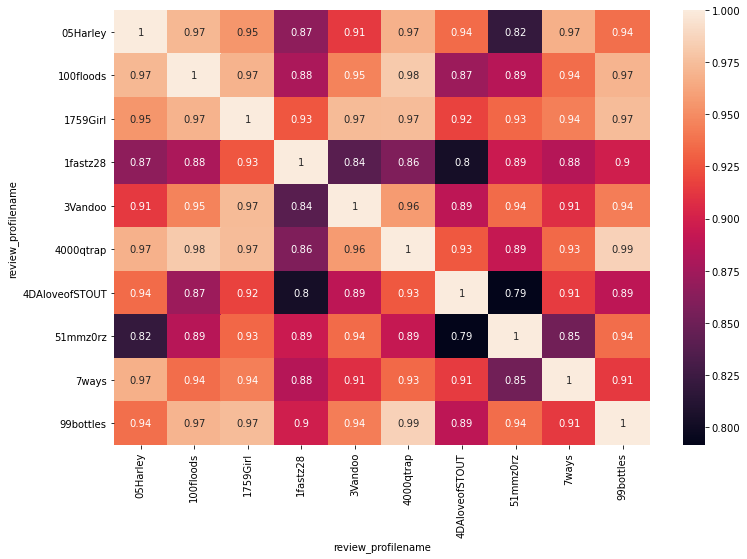

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(top_10_user.T.corr(method ='pearson'),annot=True)
plt.show()

### Item Based Similarity

In [61]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

beer_features.head()

review_profilename,05Harley,100floods,1759Girl,1fastz28,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,7ways,99bottles,...,zeledonia,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [63]:
df_subtracted.head()

review_profilename,05Harley,100floods,1759Girl,1fastz28,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,7ways,99bottles,...,zeledonia,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.161111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.00792274  0.00340005 ... -0.00597774  0.
   0.        ]
 [ 0.00792274  1.          0.02589247 ... -0.00811702  0.00352227
   0.00614257]
 [ 0.00340005  0.02589247  1.         ...  0.00144678  0.00456144
   0.02896185]
 ...
 [-0.00597774 -0.00811702  0.00144678 ...  1.          0.00253185
  -0.02228164]
 [ 0.          0.00352227  0.00456144 ...  0.00253185  1.
  -0.00806958]
 [ 0.          0.00614257  0.02896185 ... -0.02228164 -0.00806958
   1.        ]]


In [65]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.00792274, 0.00340005, ..., 0.        , 0.        ,
        0.        ],
       [0.00792274, 1.        , 0.02589247, ..., 0.        , 0.00352227,
        0.00614257],
       [0.00340005, 0.02589247, 1.        , ..., 0.00144678, 0.00456144,
        0.02896185],
       ...,
       [0.        , 0.        , 0.00144678, ..., 1.        , 0.00253185,
        0.        ],
       [0.        , 0.00352227, 0.00456144, ..., 0.00253185, 1.        ,
        0.        ],
       [0.        , 0.00614257, 0.02896185, ..., 0.        , 0.        ,
        1.        ]])

### Prediction

In [66]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.54816306, 0.90422981, 0.82334636, ..., 0.43310837, 0.91667681,
        0.48031299],
       [0.97585144, 0.39522965, 0.30491051, ..., 0.60562467, 0.88323197,
        1.10875383],
       [1.38304235, 0.81154802, 0.98494062, ..., 1.14876789, 0.92362143,
        1.40405403],
       ...,
       [3.73350819, 3.78368799, 3.71724829, ..., 3.30696777, 4.33248235,
        3.80953718],
       [1.40425591, 1.2776541 , 1.47339908, ..., 0.63135568, 1.08101958,
        1.23051889],
       [2.88231493, 1.47851148, 1.66810527, ..., 0.89691483, 1.32580057,
        1.07897838]])

In [67]:
item_predicted_ratings.shape

(2612, 2499)

In [68]:
dummy_train.shape

(2612, 2499)

### Filtering the rating only for the beers not rated by the user for recommendation


In [69]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,0.548163,0.904230,0.823346,0.780355,0.659769,1.493868,1.297371,0.822612,1.632712,0.744869,...,0.627191,1.257193,1.121781,0.549826,0.559221,0.958776,0.314360,0.433108,0.916677,0.480313
100floods,0.975851,0.395230,0.304911,0.864486,0.211401,0.694410,1.029287,0.967442,0.991560,0.664799,...,1.393561,0.787002,0.578476,0.511278,0.839427,0.556260,0.383152,0.605625,0.883232,1.108754
1759Girl,1.383042,0.811548,0.984941,0.819349,1.335453,1.345103,2.117686,1.126664,2.097393,1.381931,...,1.662563,0.933709,0.586767,0.813304,0.672543,0.413197,0.716732,1.148768,0.923621,1.404054
1fastz28,4.551007,0.000000,3.804458,3.517765,3.120844,3.603390,4.063958,2.666316,3.069891,2.835065,...,0.000000,2.177615,2.040933,2.079147,1.858400,1.079329,2.046461,1.489864,1.834225,3.637919
3Vandoo,1.486788,0.600412,0.744777,1.697564,1.235337,0.716160,1.367273,2.654266,1.625602,1.561694,...,1.373550,0.586942,0.767232,1.430885,1.020210,0.482073,0.530022,1.958671,0.968091,1.805820


### Top 5 prediction for the user -1

In [70]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
41690    5.075740
46749    4.961533
58922    4.760894
55139    4.552462
39965    4.484554
Name: 100floods, dtype: float64

### 4.Compute and visualise the similarity between the first 10 beers.

In [71]:
top_10_beer = item_final_rating.iloc[:10,:10]
top_10_beer

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
05Harley,0.548163,0.904230,0.823346,0.780355,0.659769,1.493868,1.297371,0.822612,1.632712,0.744869
100floods,0.975851,0.395230,0.304911,0.864486,0.211401,0.694410,1.029287,0.967442,0.991560,0.664799
1759Girl,1.383042,0.811548,0.984941,0.819349,1.335453,1.345103,2.117686,1.126664,2.097393,1.381931
1fastz28,4.551007,0.000000,3.804458,3.517765,3.120844,3.603390,4.063958,2.666316,3.069891,2.835065
3Vandoo,1.486788,0.600412,0.744777,1.697564,1.235337,0.716160,1.367273,2.654266,1.625602,1.561694
4000qtrap,1.170554,0.918095,0.712681,0.472940,0.607751,0.693930,0.778470,0.802076,0.729000,1.180131
4DAloveofSTOUT,0.705920,0.402285,0.998275,0.841269,0.494514,0.417320,1.332112,2.329680,1.817272,1.054095
51mmz0rz,0.816738,1.419497,0.852836,1.629490,1.240915,1.616359,2.148528,2.293378,1.769381,1.380293
7ways,0.408741,0.381905,0.897981,0.377324,1.007561,0.656964,0.572978,0.570392,0.716405,0.291615


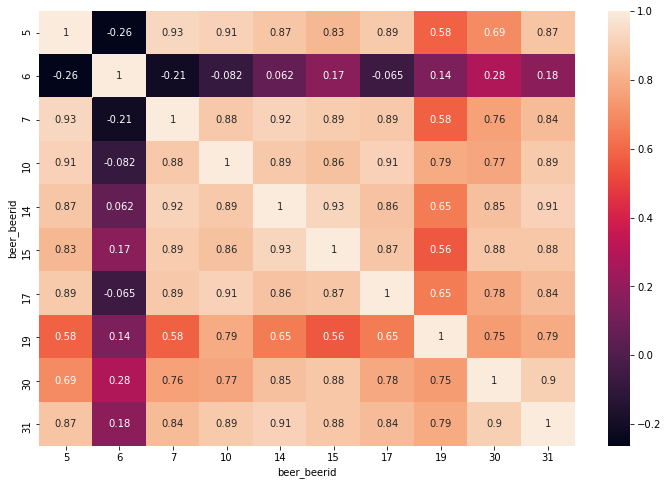

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(top_10_beer.corr(),annot=True)
plt.show()

### Evaluation

### Using User Similarity

In [73]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1.         0.         0.         ... 0.02593914 0.         0.        ]
 [0.         1.         0.01640765 ... 0.         0.         0.        ]
 [0.         0.01640765 1.         ... 0.02004008 0.         0.        ]
 ...
 [0.02593914 0.         0.02004008 ... 1.         0.03200187 0.14013463]
 [0.         0.         0.         ... 0.03200187 1.         0.        ]
 [0.         0.         0.         ... 0.14013463 0.         1.        ]]


In [74]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.07272239, 0.35113123, 0.53745719, ..., 0.        , 0.25084706,
        0.52265674],
       [0.21295034, 0.39292164, 0.18561573, ..., 0.00764822, 0.04782402,
        0.        ],
       [0.04279971, 0.63035325, 0.28869853, ..., 0.        , 0.56866214,
        0.7180138 ],
       ...,
       [0.35098847, 2.06450791, 1.30027268, ..., 0.99993108, 1.52023689,
        1.07437018],
       [1.88843276, 1.87643457, 1.08047736, ..., 0.25429006, 0.46540042,
        0.36047007],
       [0.71434738, 2.52210213, 1.99825868, ..., 0.03047008, 0.2292799 ,
        0.01281339]])

### Doing prediction for the beers rated by the user

In [75]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,6.815729,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Compare the performance of the two models using test data and suggest the one that should be deployed.

#### Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.

In [76]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [77]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [78]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [79]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.6869334524828556


### Using Item similarity

In [80]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [81]:
test_item_correlation.shape

(2499, 2499)

In [82]:
test_beer_features.shape

(2499, 2612)

In [83]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
05Harley,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,4.783951,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [85]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [86]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1491152834886487


### 6. Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

##### User Based

In [87]:
cokes=user_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]
cokes

beer_beerid
1904    30.346319
92      30.254258
34      29.600860
412     27.526102
1005    27.421578
Name: cokes, dtype: float64

In [88]:
genog=user_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]
genog

beer_beerid
412     28.969434
1093    28.363057
1013    27.928315
4083    27.927995
92      27.160517
Name: genog, dtype: float64

In [89]:
giblet=user_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]
giblet

beer_beerid
412     38.867248
1904    37.932242
2093    36.727220
104     35.641066
1708    35.336551
Name: giblet, dtype: float64

##### Item Based

In [90]:
cokess=item_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]
cokess

beer_beerid
3706     17.864307
53899    17.332245
2147     15.900059
705      15.190721
710      15.099543
Name: cokes, dtype: float64

In [91]:
genog=item_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]
genog

beer_beerid
2588     5.438516
25989    5.134667
1070     5.114994
2751     5.114666
39527    5.002618
Name: genog, dtype: float64

In [92]:
giblet=item_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]
giblet

beer_beerid
1207    5.788846
138     5.673961
1276    5.236514
1332    5.234607
712     5.220521
Name: giblet, dtype: float64